In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Load NCR data from CSV
data = pd.read_csv('estimated_cost_clustered.csv', encoding='latin-1')

<ipython-input-6-7817a86d79d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Estimated_Cost_of_NCR'] *= 1.22


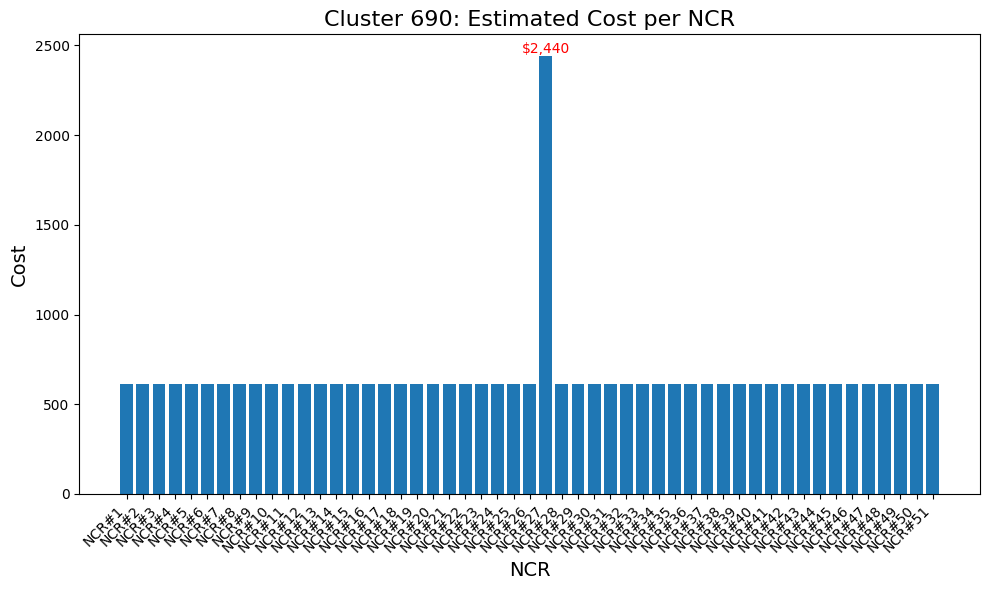

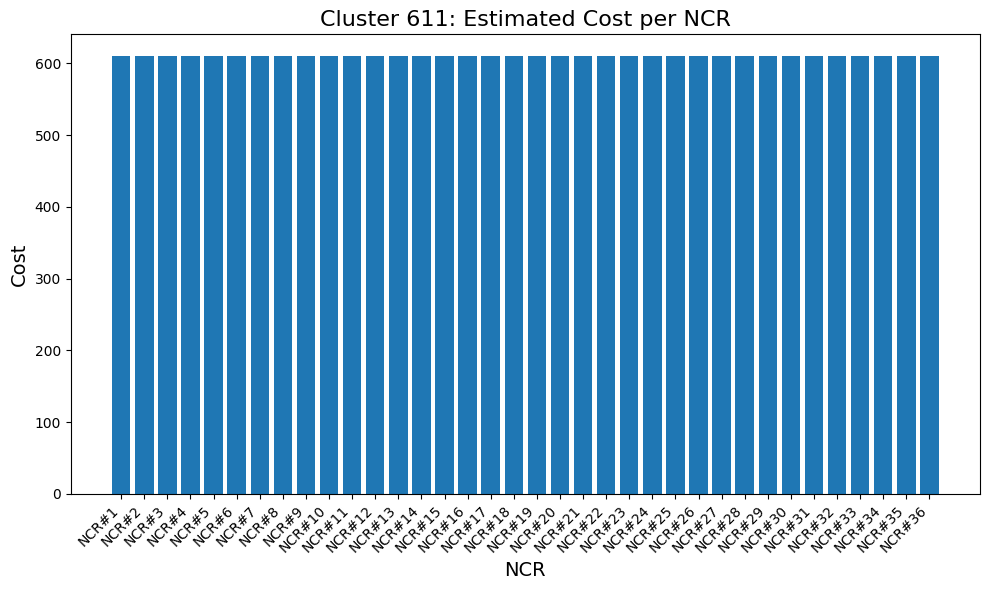

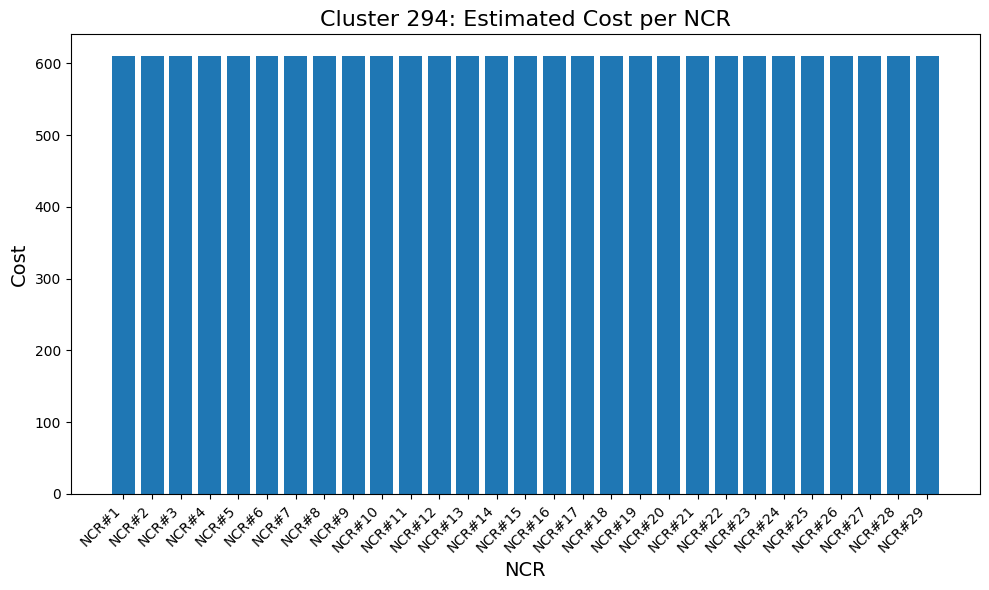

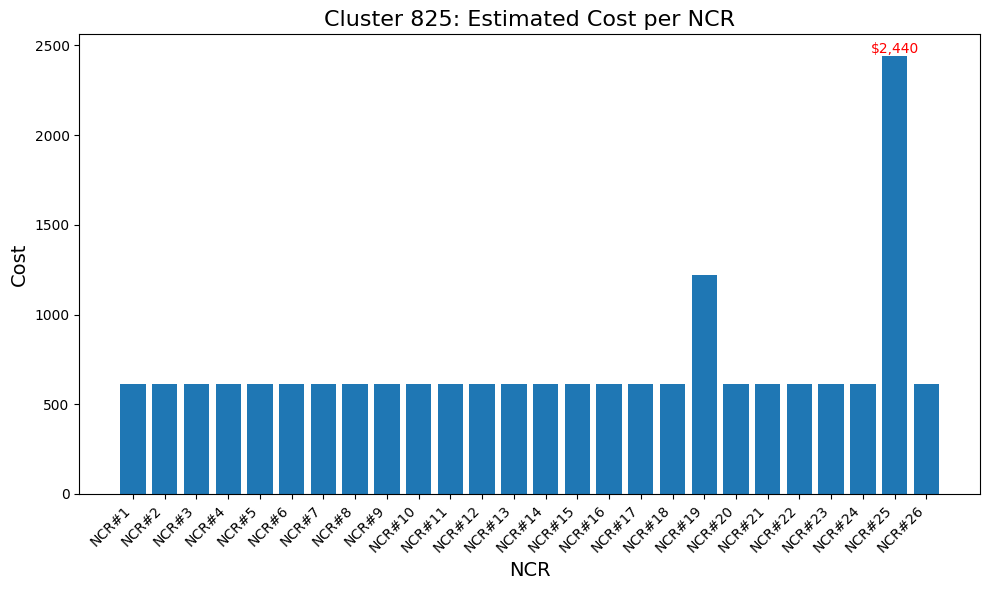

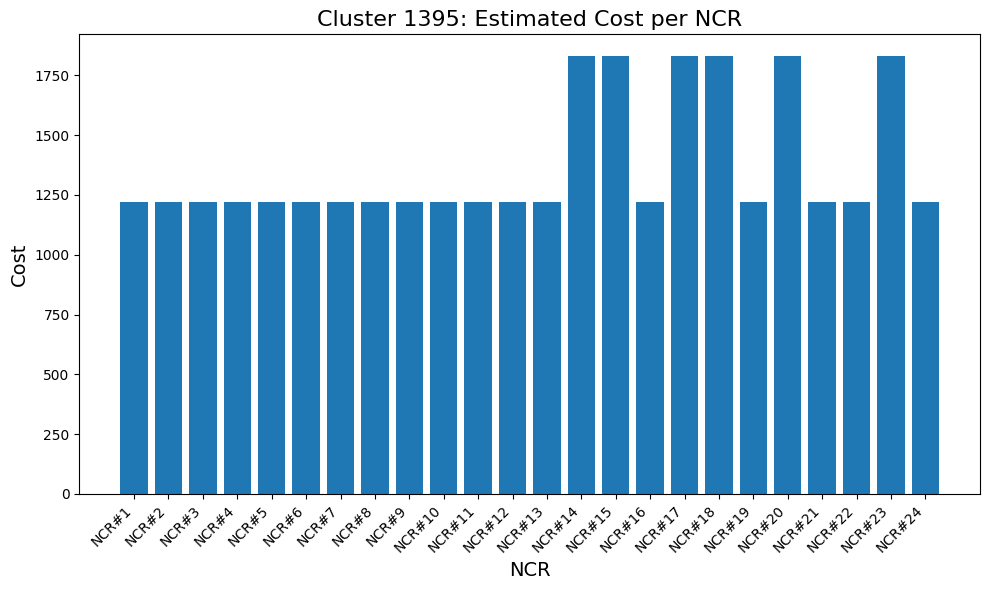

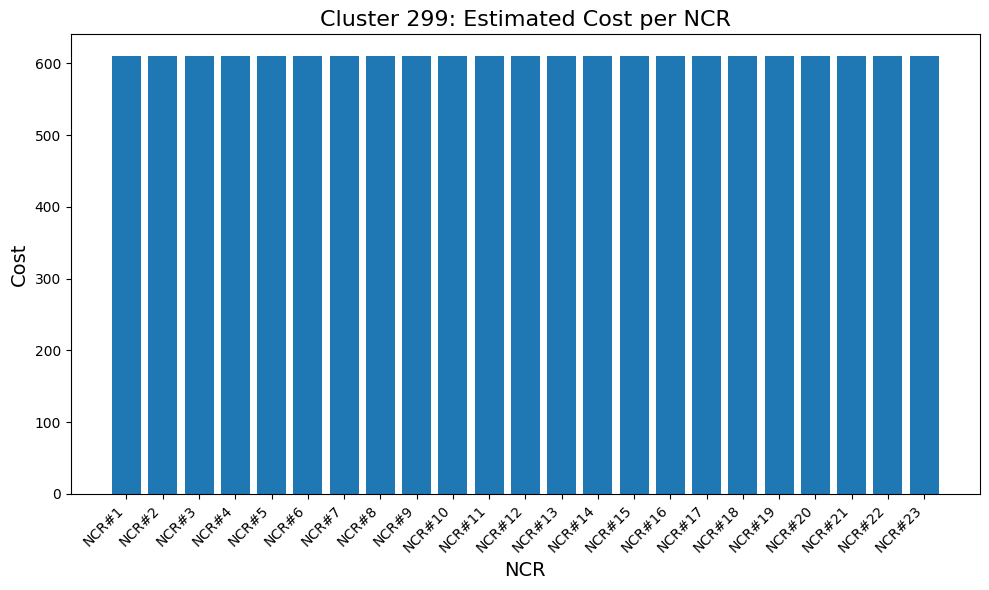

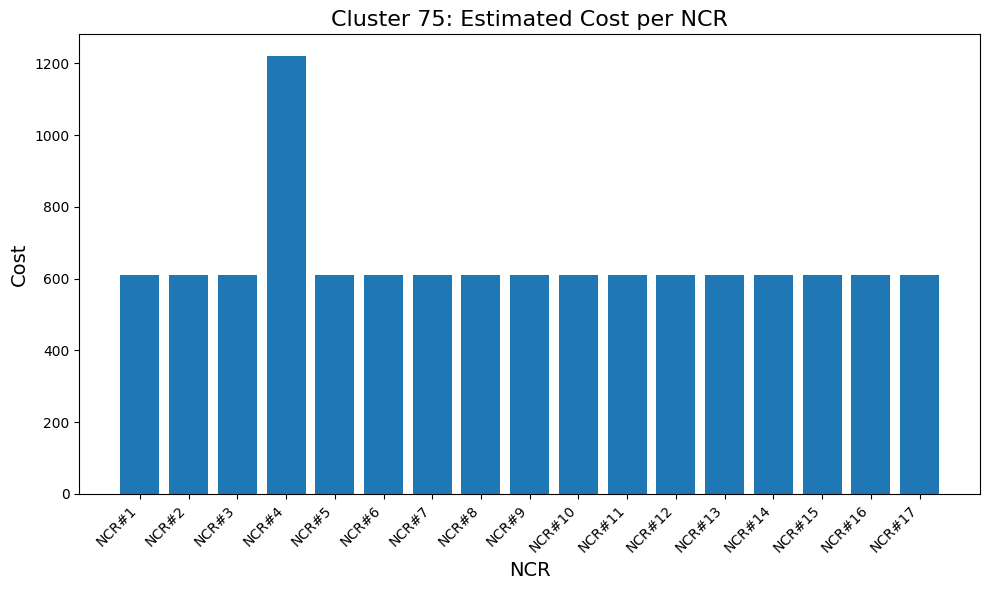

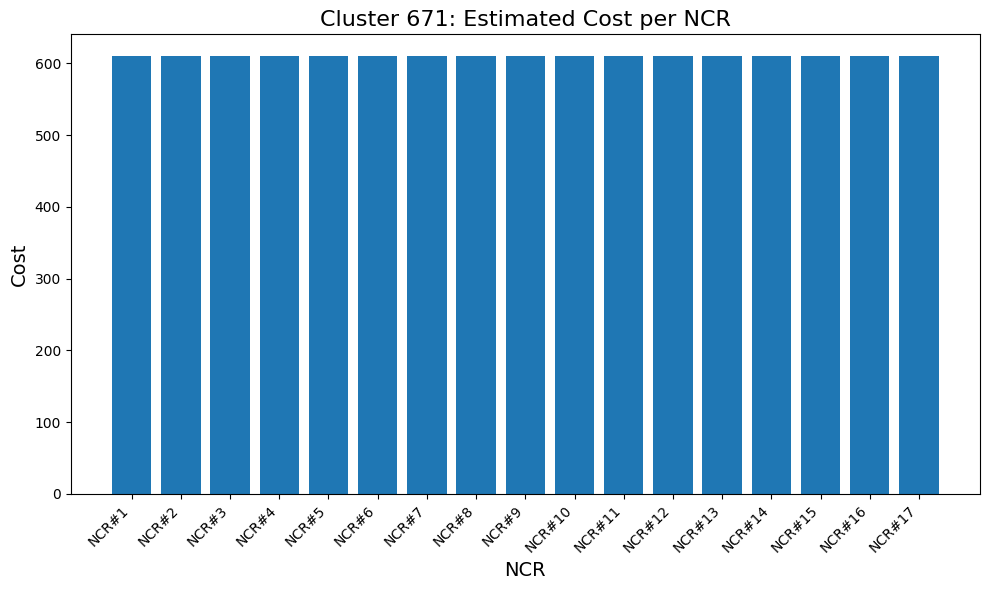

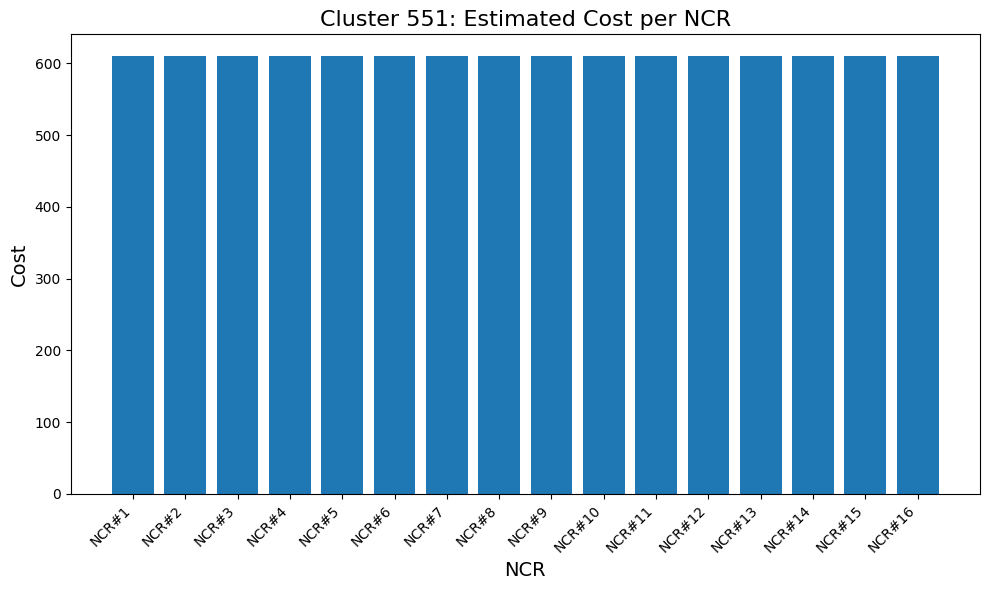

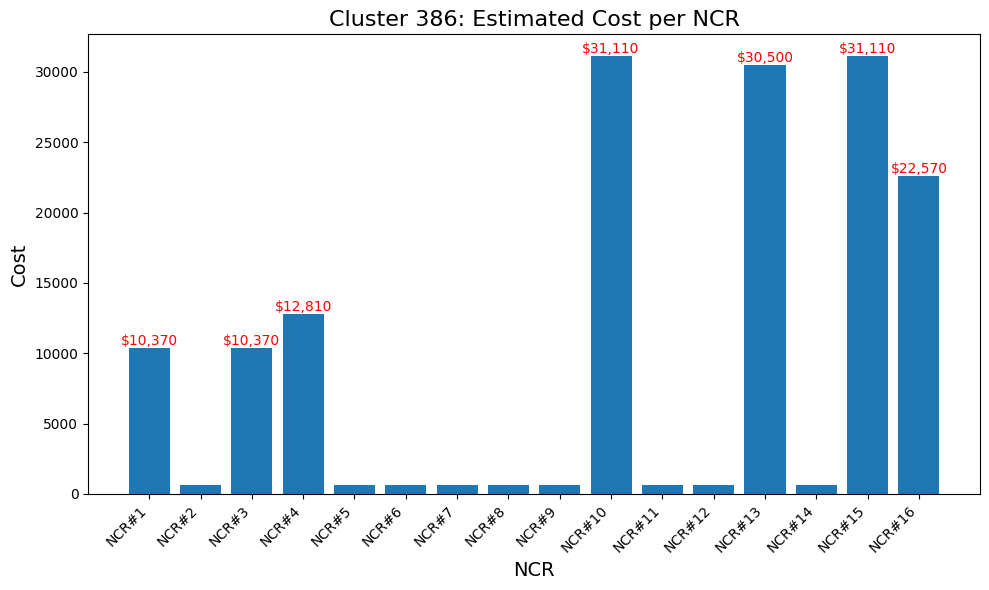

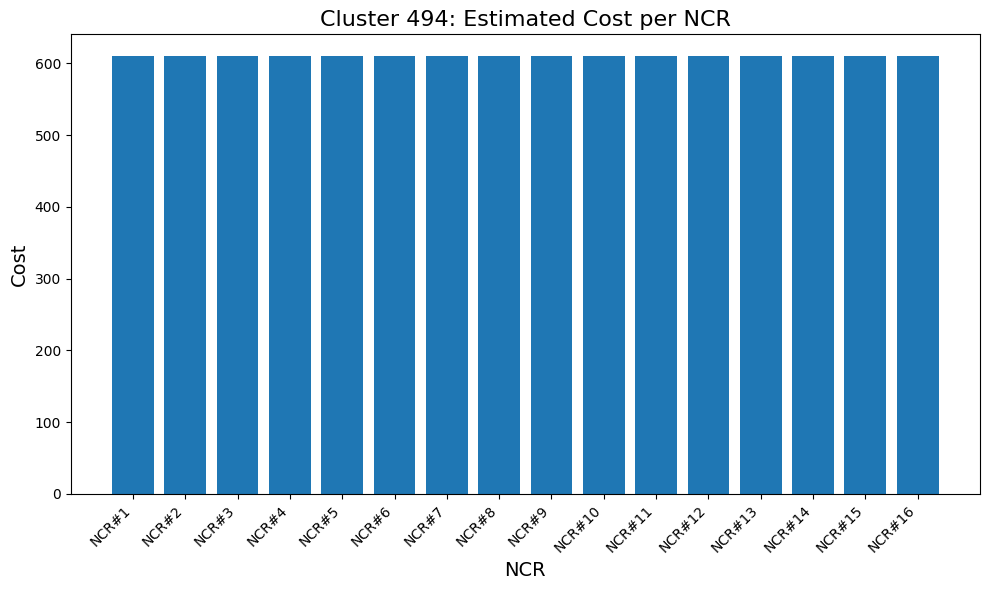

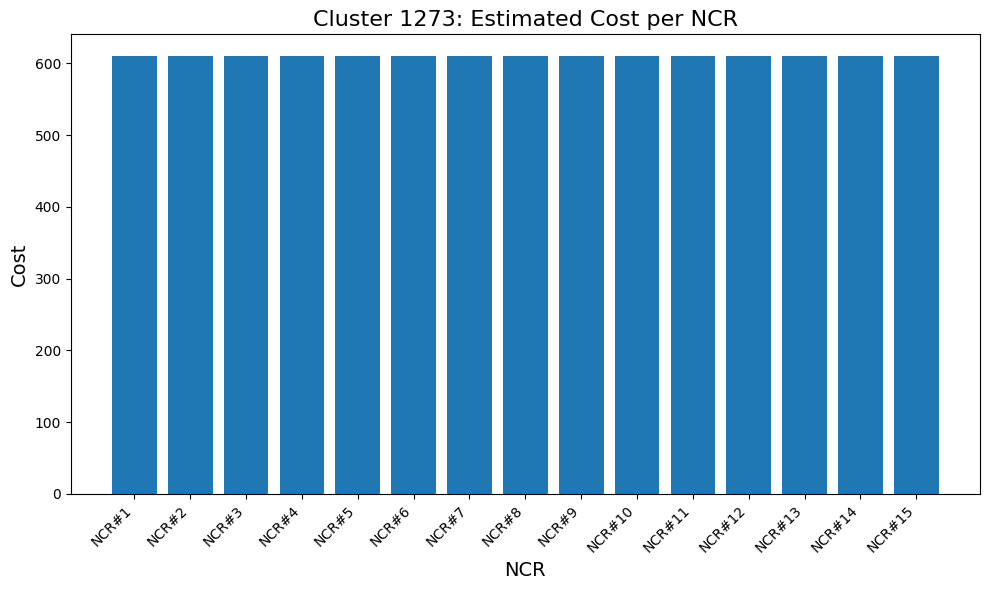

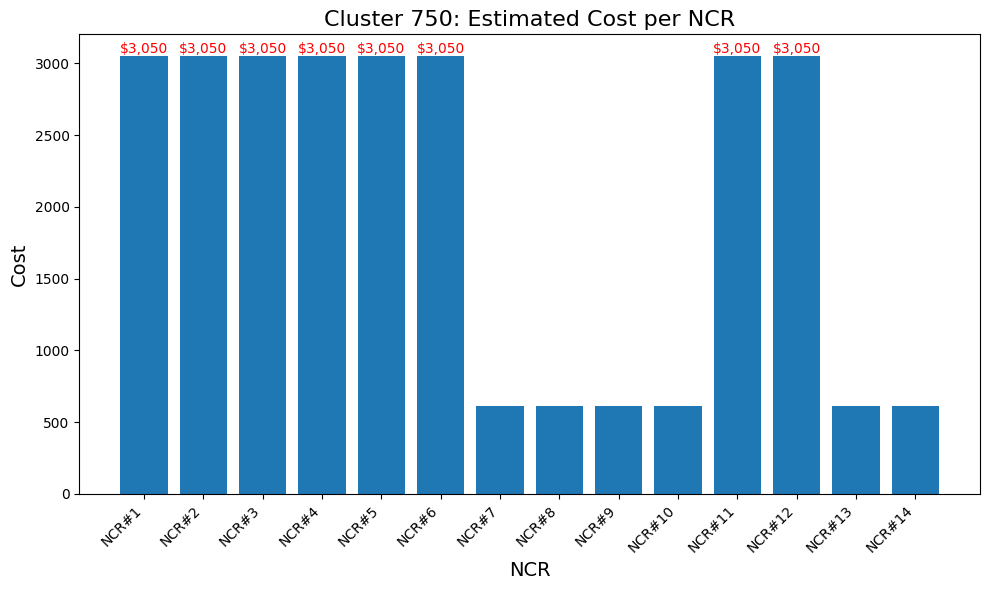

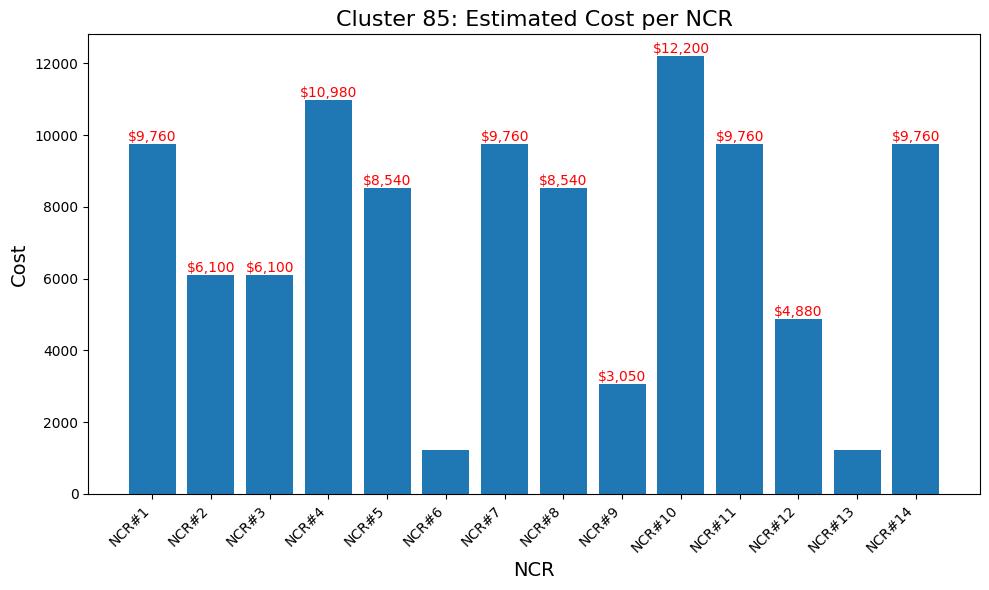

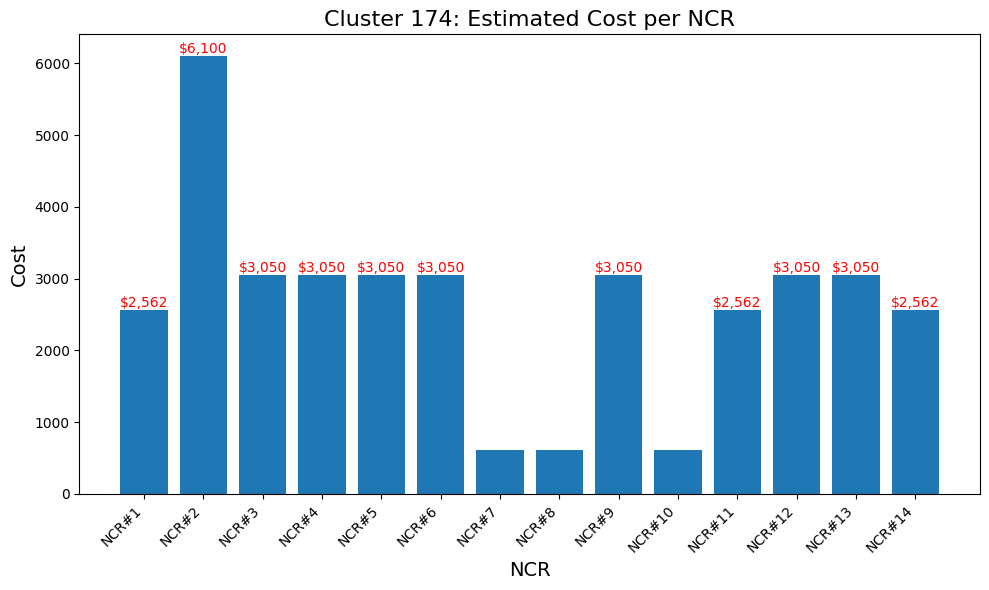

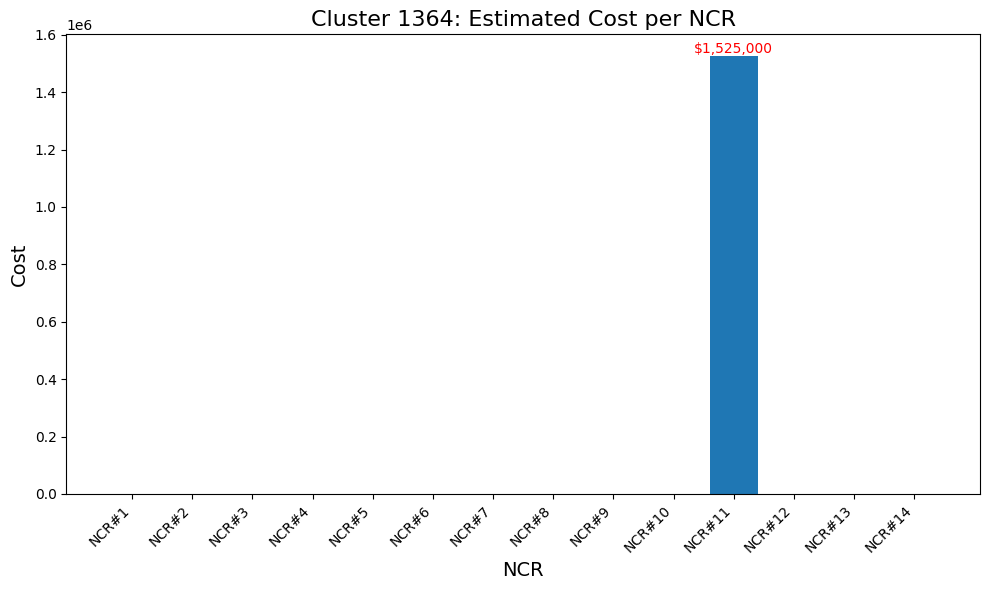

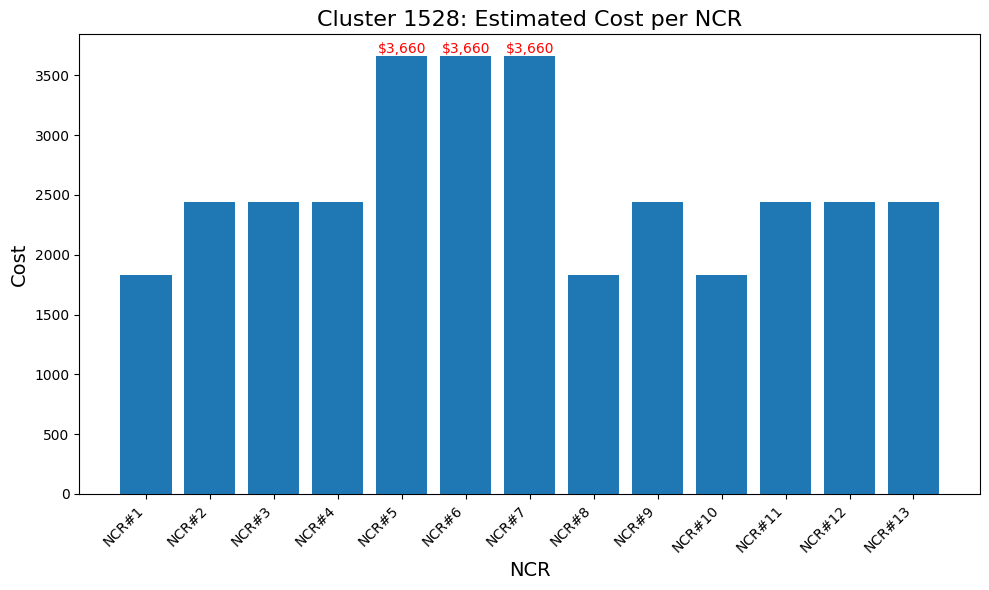

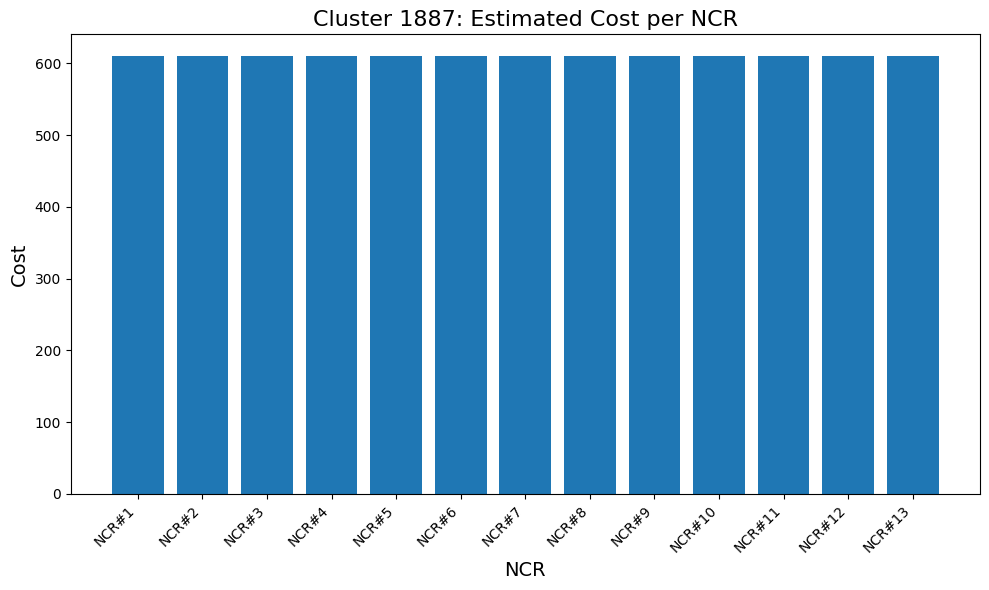

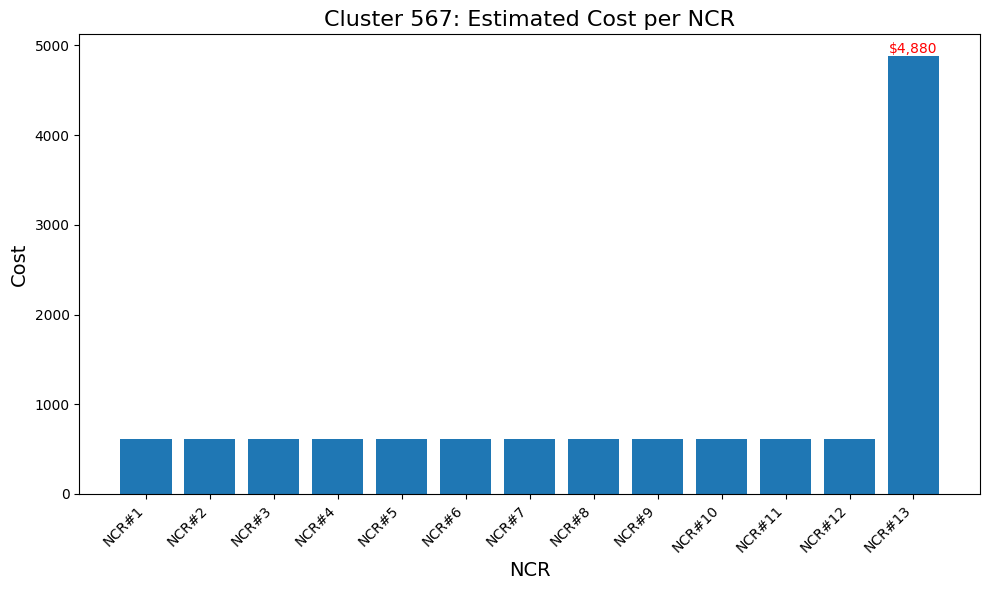

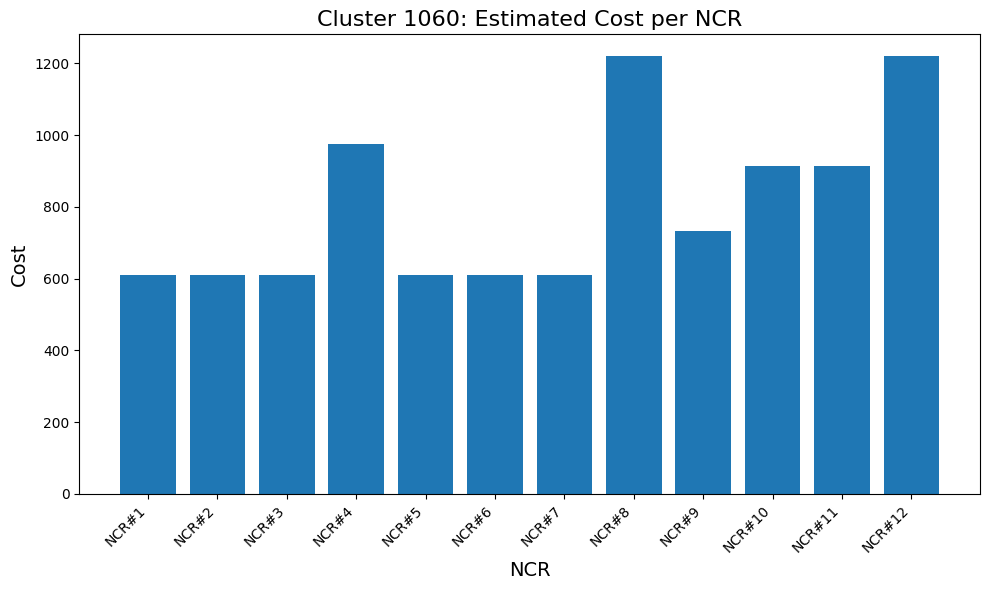

In [6]:


# Identify the top 20 biggest clusters (by the number of descriptions)
top_20_clusters = data['Cluster'].value_counts().head(20).index


# Loop through each cluster and create individual bar charts
for cluster_label in top_20_clusters:
    # Filter the data for the current cluster
    cluster_data = data[data['Cluster'] == cluster_label]
  # Convert Estimated_Cost to USD
    cluster_data['Estimated_Cost_of_NCR'] *= 1.22

     # Find the smallest cost in the cluster
    min_cost = cluster_data['Estimated_Cost_of_NCR'].min()

    # Create x-axis labels as 'NCR#1', 'NCR#2', etc.
    x_labels = [f'NCR#{i + 1}' for i in range(len(cluster_data))]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(
        x_labels,
        cluster_data['Estimated_Cost_of_NCR']
    )
    # Annotate bars that are greater than 1000 more than the smallest cost
    for idx, cost in enumerate(cluster_data['Estimated_Cost_of_NCR']):
        if cost >= min_cost + 1000:  # Condition for high values
            plt.text(
                idx, cost, f"${cost:,.0f}", ha='center', va='bottom', fontsize=10, color='red'
            )



    # Add chart details
    plt.title(f"Cluster {cluster_label}: Estimated Cost per NCR", fontsize=16)
    plt.xlabel("NCR", fontsize=14)
    plt.ylabel("Cost", fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Show the bar chart
    plt.show()

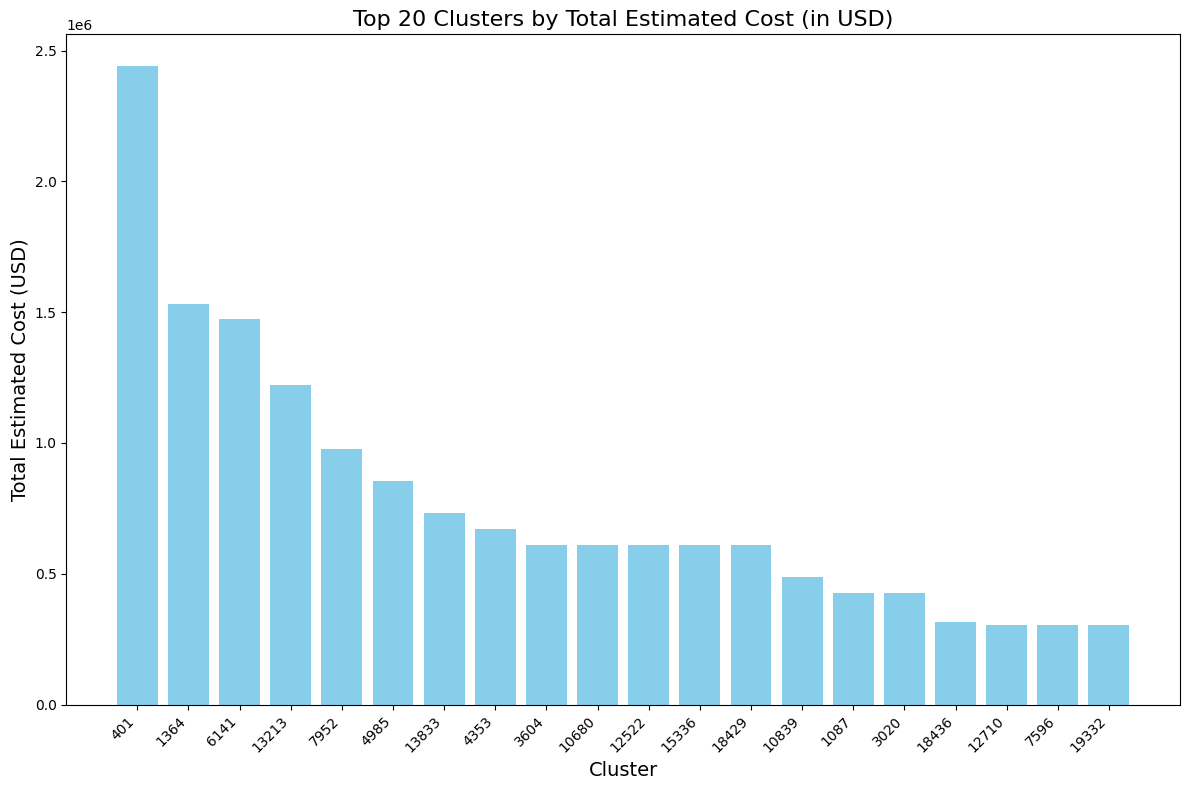

In [11]:
data['Estimated_Cost_USD'] = data['Estimated_Cost_of_NCR'] * 1.22

# Calculate total estimated cost per cluster
cluster_totals = data.groupby('Cluster')['Estimated_Cost_USD'].sum().sort_values(ascending=False)

# Limit to the top 20 clusters
top_20_cluster_totals = cluster_totals.head(20)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_cluster_totals.index.astype(str), top_20_cluster_totals.values, color='skyblue')



# Add chart details
plt.title("Top 20 Clusters by Total Estimated Cost (in USD)", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Total Estimated Cost (USD)", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the chart
plt.show()